In [2]:
###### invite people for the Kaggle party
import numpy as np
import pandas as pd
import kaggle
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Uploads the kaggleApi directly for easier use
from kaggle.api.kaggle_api_extended import KaggleApi

In [4]:
# Startup the api and authenticate it using my kaggle key (which was previously downloaded into my directory and put on the .gitignore list for security purposes)
api = KaggleApi()
api.authenticate()

In [5]:
# Downloads the dataset into our directory, Since it's multiple files it comes as a .zip file
api.competition_download_files('house-prices-advanced-regression-techniques')

In [6]:
pwd

'C:\\Users\\User\\Documents\\GitHub\\CapstoneTwo'

In [7]:
import zipfile
with zipfile.ZipFile("house-prices-advanced-regression-techniques.zip","r") as zip_ref:
    zip_ref.extractall() # If I don't specify a directory it goes into the current directory

In [8]:
with open('data_description.txt','r') as file:
    file1=file.read()

In [9]:
# this is the info file where I have all the different explanations of the categories within the columns.  
# I should use this to double check if the values in the columns are within range
print(file1) 

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [10]:
# Import the train data
train = pd.read_csv('train.csv', )

In [11]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
# Alleys, FireplaceQu, PoolQC, Fence, MiscFeature are values with very high null rates

In [14]:
train['YrSold'].head()  # Looks like MoSold and YrSold are just integers but I think that's okay

0    2008
1    2007
2    2008
3    2006
4    2008
Name: YrSold, dtype: int64

In [15]:
train['MoSold'].describe()  #Months seem to be within 1-12 so that's good

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64

In [16]:
# This category has numbers but they are categorical in reality
train['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [17]:
train['MSSubClass']=train['MSSubClass'].astype('object')

In [18]:
train['MSSubClass'].unique()

array([60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40],
      dtype=object)

In [19]:
uniqueness = {n:train[n].unique() for n in train.keys()} # This gives me all the unique values to compare to description.txt.

In [20]:
Missing = {n:train[n].isna() for n in train.keys()}

In [21]:
Missing_data=pd.DataFrame(Missing).sum()
Missing_data

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [22]:
# The missing data.
Missing_data[Missing_data>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [23]:
# There are some areas with A LOT of missing data that need to be dropped.
# First off there is one dataset with not electrical data so that is easy to drop
train_clean = train.dropna(subset = ['Electrical'])

In [24]:
# MiscFeature I'm thinking of dropping because there is a category for MiscFeature Value 
# I'll test if there are any missmatching first
train_clean[train_clean['MiscFeature'].isna()]['MiscVal'].describe()

count    1405.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: MiscVal, dtype: float64

In [25]:
train_clean[train_clean['MiscVal']>0]['MiscFeature'].unique()
# Looks like there are no NaN for any features that have a monitary value

array(['Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [26]:
# Second there are some categories/columns that are missing a great deal of data.  Alley, Pool, Fence and MiscFeature.
# I'm going to drop Alley because I don't believe that it is a major feature in home buying.  
# Pool I'm keeping even though it's very small because I know that this increases the price of a property
# Fence I'm also leaving in because a poor quality fence will drop the value of a home because it will have to be addressed by the new owners
train_clean = train.drop(['Alley', 'MiscFeature'], axis=1)

In [27]:
# It looks like some of the houses have NaN in the Masenry Veneer Type.  Looking at the category 'None' some of them have area and some don't  
# So I must descide if the ones with NaN are area 0 and type None or should I drop them
# So I have two questions.  Are the ones with 'None' and have an area the error or are the NaN values actually None type and 0 area?
train_clean[train_clean['MasVnrType']=='None']['MasVnrArea'].describe()

count    864.000000
mean       1.094907
std       18.569659
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      344.000000
Name: MasVnrArea, dtype: float64

In [28]:
MasVnrType_None =train_clean[train_clean['MasVnrType']=='None']['MasVnrArea']

In [29]:
MasVnrType_None.describe()

count    864.000000
mean       1.094907
std       18.569659
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      344.000000
Name: MasVnrArea, dtype: float64

In [30]:
# Well there are five of these.  Clearly 1 is not good data. Can't have one ft of masenry.  so those have to go.  I'm going to guess that the rest are probably mis classified as "None"
MasVnrType_None[MasVnrType_None>0]

624     288.0
773       1.0
1230      1.0
1300    344.0
1334    312.0
Name: MasVnrArea, dtype: float64

In [31]:
# For the data that has a Vaneer type there are still some that equal 0 feet.  That also seems like bad data.
train_clean[train_clean['MasVnrType']!='None']['MasVnrArea'].describe()

count     588.000000
mean      254.430272
std       205.620539
min         0.000000
25%       112.750000
50%       202.500000
75%       329.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [32]:
MasVnrType_Some = train_clean[train_clean['MasVnrType']!='None']['MasVnrArea']

In [33]:
# Two entries that need to go
MasVnrType_Some[MasVnrType_Some==0]

688     0.0
1241    0.0
Name: MasVnrArea, dtype: float64

In [34]:
# Removes the Vaneered masenry that had area of zero
train_clean=train_clean.drop(train_clean[(train_clean['MasVnrType']!='None') & (train_clean['MasVnrArea'] == 0.0)].index)
train_clean[train_clean['MasVnrType']!='None']['MasVnrArea'].describe()

count     586.000000
mean      255.298635
std       205.431939
min        11.000000
25%       113.250000
50%       203.000000
75%       331.750000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [35]:
# Removes the non-vaneered masenry that have area above zero
train_clean=train_clean.drop(train_clean[(train_clean['MasVnrType']=='None') & (train_clean['MasVnrArea'] > 0.0)].index)
train_clean[train_clean['MasVnrType']=='None']['MasVnrArea'].describe()

count    859.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: MasVnrArea, dtype: float64

In [36]:
train_clean['MasVnrType'].describe()

count     1445
unique       4
top       None
freq       859
Name: MasVnrType, dtype: object

In [37]:
train_clean['MasVnrArea'].fillna(0)

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1453, dtype: float64

In [38]:
# Setting the MasVnrType NaN to 'None'
train_clean['MasVnrType'].fillna(value = 'None', inplace=True)
train_clean['MasVnrType'].unique() # Checking if it worked

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [39]:
# Setting the corresponding NaN in MasVnrArea to 0
train_clean['MasVnrArea'].fillna(value = 0, inplace=True)
train_clean['MasVnrArea'].isna().sum() # Checking if it worked

0

In [40]:
# No duplicate Id's so that's a positive
train_clean.duplicated(subset=['Id']).sum()

0

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

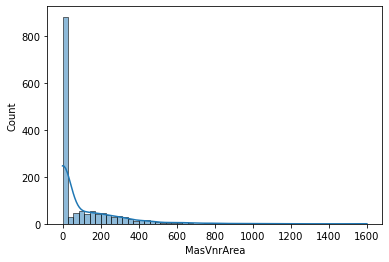

In [41]:
sns.histplot(data=train_clean, x="MasVnrArea", kde=True)

In [42]:
train_clean['MasVnrArea'].describe()

count    1453.000000
mean      102.962836
std       180.827856
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [43]:
# Lets check what has NaN in our data
Missing=train_clean.isna().sum()
Missing

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      257
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 79, dtype: int64

In [44]:
Missing[Missing>0]

LotFrontage      257
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      687
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1446
Fence           1172
dtype: int64

In [2]:
# how to group the data by neighborhood so we can add a new column that has mean_neighborhood price
# I need to do this first because after I split the data in to dummie categories we will have issues getting the data agoin

In [45]:
df = train_clean.copy()

In [52]:
df.columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
#makes a new db with the mean neighborhood prices
gf = df[['Neighborhood', 'YrSold', 'SalePrice']].groupby(['Neighborhood', 'YrSold']).mean()

In [61]:
gf

SalePrice
Neighborhood YrSold               
Blmngtn      2006    217087.000000
             2007    183350.500000
             2008    175447.500000
             2009    176720.000000
             2010    192000.000000
...                            ...
Timber       2009    245437.500000
             2010    245160.000000
Veenker      2006    273333.333333
             2007    214900.000000
             2008    244000.000000

[119 rows x 1 columns]

In [62]:
# sets an index and makes a dictionary of the neighborhood means
n_map = gf.to_dict()

In [63]:
n_map

{'SalePrice': {('Blmngtn', 2006): 217087.0,
  ('Blmngtn', 2007): 183350.5,
  ('Blmngtn', 2008): 175447.5,
  ('Blmngtn', 2009): 176720.0,
  ('Blmngtn', 2010): 192000.0,
  ('Blueste', 2008): 151000.0,
  ('Blueste', 2009): 124000.0,
  ('BrDale', 2006): 96750.0,
  ('BrDale', 2007): 113833.33333333333,
  ('BrDale', 2008): 95225.0,
  ('BrDale', 2009): 116500.0,
  ('BrDale', 2010): 88000.0,
  ('BrkSide', 2006): 112746.66666666667,
  ('BrkSide', 2007): 135737.5,
  ('BrkSide', 2008): 121707.14285714286,
  ('BrkSide', 2009): 134994.11764705883,
  ('BrkSide', 2010): 96500.0,
  ('ClearCr', 2006): 199166.66666666666,
  ('ClearCr', 2007): 236333.33333333334,
  ('ClearCr', 2008): 208991.5,
  ('ClearCr', 2009): 169875.0,
  ('ClearCr', 2010): 246850.0,
  ('CollgCr', 2006): 199016.40625,
  ('CollgCr', 2007): 213999.93333333332,
  ('CollgCr', 2008): 187718.05555555556,
  ('CollgCr', 2009): 192317.76923076922,
  ('CollgCr', 2010): 203700.0,
  ('Crawfor', 2006): 196635.18181818182,
  ('Crawfor', 2007): 198

In [70]:
# add new column with mean indexed on Neighborhood
#df['mean_np'] = df['Neighborhood'].map(n_map)
df['mean_np'] = df['Neighborhood', 'YrSold'].map(n_map['SalePrice'])

KeyError: ('Neighborhood', 'YrSold')

In [65]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,mean_np
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,0,2,2008,WD,Normal,208500,NaN
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,0,5,2007,WD,Normal,181500,NaN
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,0,9,2008,WD,Normal,223500,NaN
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,0,2,2006,WD,Abnorml,140000,NaN
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,0,12,2008,WD,Normal,250000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,0,8,2007,WD,Normal,175000,NaN
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,0,2,2010,WD,Normal,210000,NaN
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,2500,5,2010,WD,Normal,266500,NaN
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,0,4,2010,WD,Normal,142125,NaN


In [67]:
train_clean['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [68]:
train_clean['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [ ]:
#Looks like the categories which have NA as one of their options has automatically been turned into a .NaN

In [ ]:
# So I have 43 categorical columns and what I need to do is to either turn all my categories into numbers or I need to try something else

In [69]:
# first I need to collect all my categorical categories 
cat_columns = train_clean.select_dtypes(['object']).columns

In [70]:
cat_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# one option is I can factorize these columns, but some of the data are 5-1 being good to poor and others are not so clear
# Is there a way to factorize the columns in reverse order?  I think for almost all of the data this would work.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html

In [ ]:
# Differentiate between ordinal and nonordinal data
# Ordinal is ranked theings like 1-10 or excelent-good-fair-poor
# Nonordinal is things like wood vs metal siding
# Rank the ordinal data
# setup dummies for the non ordinal by using pandas.get_dummies

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [ ]:
# Get the data by making unique dictionaries that have values associated with each unique value.
# So for each cat_column make a dictionary depending on the data type it is.

In [71]:
# Make a dictionary of each category and all the possible values in that category
cat_dict ={}
for n in list(cat_columns):
    cat_dict[n]=train_clean[n].unique()

In [72]:
cat_dict

{'MSSubClass': array([60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40],
       dtype=object),
 'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
 'Street': array(['Pave', 'Grvl'], dtype=object),
 'LotShape': array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object),
 'LandContour': array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object),
 'Utilities': array(['AllPub', 'NoSeWa'], dtype=object),
 'LotConfig': array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object),
 'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object),
 'Neighborhood': array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
        'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
        'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
        'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
        'Blueste'], dtype=object),
 'Condition1': array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
        'RRNe']

In [73]:
# There are a lot of ratings with Ex, Gd, TA, Fa, Po, and NA.  Lets make a dictionary which translates these values into numerical values
# There is also a similar rating Gd, Av, Mn, No, NA that has been added as alternatives to values 1-3
rating ={'Ex': 5, 'Gd': 4, 'TA':3, 'Av':3, 'Fa':2, 'Mn':2, 'Po':1, 'No':1}

In [74]:
# Makes binary for Yes, No, and also has 1/2 for Partial
binary ={'Y':1, 'P': 0.5,'N':0}

In [75]:
# Converts Paved vs Gravel to be binary 1/0 leaving the NaN alone until we do some exploration to see if we need to drop the row
pave={'Pave':1,'Grvl':0}

In [ ]:
from sklearn.preprocessing import LabelEncoder # changes values into an ordinal numbering scheme (and is scaleable)
<Code goes here>
# issue with this code is that the lables need to be in order, and my .unique() method of finding what the categories are doesn't always get them in order or have all the possible values.
# So I'm going to stick with my ratings code which isn't scalable for the moment

In [76]:
cat_dict2=cat_dict.copy()

In [77]:
# maps our list of ratings onto the text values for ratings if they have the Gd, TA etc...
# Put in an else clause for setting up dummie variables for the rest.
# This works for my categories but it doesn't work for adding to the main list because it's the keys that need to be focused on for the mapping fo the values.
for n,m in cat_dict2.items():
    if 'Gd' in m:
        cat_dict2[n] = list((pd.Series(m)).map(rating))
    elif 'Y'in m:
        cat_dict2[n] = list((pd.Series(m)).map(binary))    
    elif 'Pave'in m:
        cat_dict2[n] = list((pd.Series(m)).map(pave))
    else:
        cat_dict2[n] = pd.get_dummies(cat_dict2[n], dummy_na=True)

In [78]:
cat_dict2 # This is what I want the data to look like

{'MSSubClass':     20.0   30.0   40.0   45.0   50.0   60.0   70.0   75.0   80.0   85.0   \
 0       0      0      0      0      0      1      0      0      0      0   
 1       1      0      0      0      0      0      0      0      0      0   
 2       0      0      0      0      0      0      1      0      0      0   
 3       0      0      0      0      1      0      0      0      0      0   
 4       0      0      0      0      0      0      0      0      0      0   
 5       0      0      0      1      0      0      0      0      0      0   
 6       0      0      0      0      0      0      0      0      0      0   
 7       0      0      0      0      0      0      0      0      0      0   
 8       0      1      0      0      0      0      0      0      0      0   
 9       0      0      0      0      0      0      0      0      0      1   
 10      0      0      0      0      0      0      0      0      1      0   
 11      0      0      0      0      0      0      0      0   

In [79]:
# Set up dictionaries of the keys that need to be mapped
rating_dic =[]
binary_dic =[]
pave_dic=[]
nominal_dic=[]
for n,m in cat_dict.items():
    if 'Gd' in m:
        rating_dic.append(n)
    elif 'Y'in m:
        binary_dic.append(n)    
    elif 'Pave'in m:
        pave_dic.append(n)
    else:
        nominal_dic.append(n)
print(rating_dic,binary_dic,pave_dic,nominal_dic)

['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'] ['CentralAir', 'PavedDrive'] ['Street'] ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'Fence', 'SaleType', 'SaleCondition']


In [80]:
train_clean2=train_clean.copy()

In [81]:
# Then I have to map the values back onto the main dataset
for n,m in train_clean2.select_dtypes(['object']).items():
    if n in rating_dic:
        train_clean2[n] = list((pd.Series(m)).map(rating)) # This works just fine
    elif n in binary_dic:
        train_clean2[n] = list((pd.Series(m)).map(binary))    # So does this
    elif n in pave_dic:
        train_clean2[n] = list((pd.Series(m)).map(pave))  # This three
    elif n in nominal_dic: 
        train_clean2[n] = pd.get_dummies(train_clean2[n], dummy_na=True) # Something isn't right with this one

In [82]:
train_clean2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0,0,65.0,8450,1,0,0,1,0,...,0,0,NaN,0,0,2,2008,0,0,208500
1,2,1,0,80.0,9600,1,0,0,1,0,...,0,0,NaN,0,0,5,2007,0,0,181500
2,3,0,0,68.0,11250,1,1,0,1,0,...,0,0,NaN,0,0,9,2008,0,0,223500
3,4,0,0,60.0,9550,1,1,0,1,1,...,0,0,NaN,0,0,2,2006,0,1,140000
4,5,0,0,84.0,14260,1,1,0,1,0,...,0,0,NaN,0,0,12,2008,0,0,250000


In [83]:
train_clean2['MSSubClass'].head() # This is busted!  There is only 0/1 for the entries and we don't have several subtypes of MSSubClass

0    0
1    1
2    0
3    0
4    0
Name: MSSubClass, dtype: uint8

In [84]:
df=train_clean.copy()

In [85]:
# Then I have to map the values back onto the main dataset
for n,m in df.select_dtypes(['object']).items():
    if n in rating_dic:
        df[n] = list((pd.Series(m)).map(rating)) # This works just fine
    elif n in binary_dic:
        df[n] = list((pd.Series(m)).map(binary))    # So does this
    elif n in pave_dic:
        df[n] = list((pd.Series(m)).map(pave))  # This three

In [86]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
for t in [df.columns[i] for i,dt in enumerate(df.dtypes) if dt=='object']:
    dummy_block = pd.get_dummies( df[t] )
    dummy_block.columns = pd.MultiIndex.from_product([[t[0]],[f'{t[1]}_{c}' for c in dummy_block.columns]],
                                                     names=df.columns.names)
    df = pd.concat([df.drop(t,axis=1),dummy_block],axis=1).sort_index(axis=1)

print(df)

ValueError: Length of names must match number of levels in MultiIndex.

In [ ]:
# So multiindexing isn't the solution because there will be different number of levels...

In [88]:
df = pd.get_dummies(data=df, columns=nominal_dic)

In [89]:
df.head()

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,1,7,5,2003,2003,196.0,4,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,1,6,8,1976,1976,0.0,3,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,1,7,5,2001,2002,162.0,4,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,1,7,5,1915,1970,0.0,3,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,1,8,5,2000,2000,350.0,4,...,0,0,0,1,0,0,0,0,1,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Columns: 256 entries, Id to SaleCondition_Partial
dtypes: float64(12), int64(39), uint8(205)
memory usage: 881.2 KB


In [91]:
df.describe()

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1453.000000,1196.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,...,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,729.066070,70.077759,10518.968341,0.995871,6.099105,5.576050,1971.205093,1984.868548,102.962836,3.395733,...,0.003441,0.082588,0.002065,0.869236,0.069511,0.002753,0.008259,0.013765,0.821060,0.084652
std,421.629227,24.292668,10000.370314,0.064150,1.384121,1.114902,30.235336,20.655976,180.827856,0.574632,...,0.058581,0.275353,0.045408,0.337258,0.254409,0.052414,0.090533,0.116553,0.383434,0.278460
min,1.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.000000,59.000000,7540.000000,1.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,729.000000,69.000000,9473.000000,1.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1093.000000,80.000000,11606.000000,1.000000,7.000000,6.000000,2000.000000,2004.000000,164.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,313.000000,215245.000000,1.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
# I wonder if Id is redundant?  I could reset index to Id
df=df.reindex(df['Id'])

In [93]:
df=df.drop(['Id'], axis=1)

In [94]:
df.head()

,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,80.0,9600.0,1.0,6.0,8.0,1976.0,1976.0,0.0,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,68.0,11250.0,1.0,7.0,5.0,2001.0,2002.0,162.0,4.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,9550.0,1.0,7.0,5.0,1915.0,1970.0,0.0,3.0,3.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260.0,1.0,8.0,5.0,2000.0,2000.0,350.0,4.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,85.0,14115.0,1.0,5.0,5.0,1993.0,1995.0,0.0,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Data Cleaning and orginization complete?

In [96]:
# Save the file
df.to_csv('test_clean.csv')